In [1]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

In [2]:
file_id = '1F_LOzrBtu4EAbmb2bx9SufprVDXk0Atm'
url = f'https://drive.google.com/uc?id={file_id}'

download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [3]:
# df

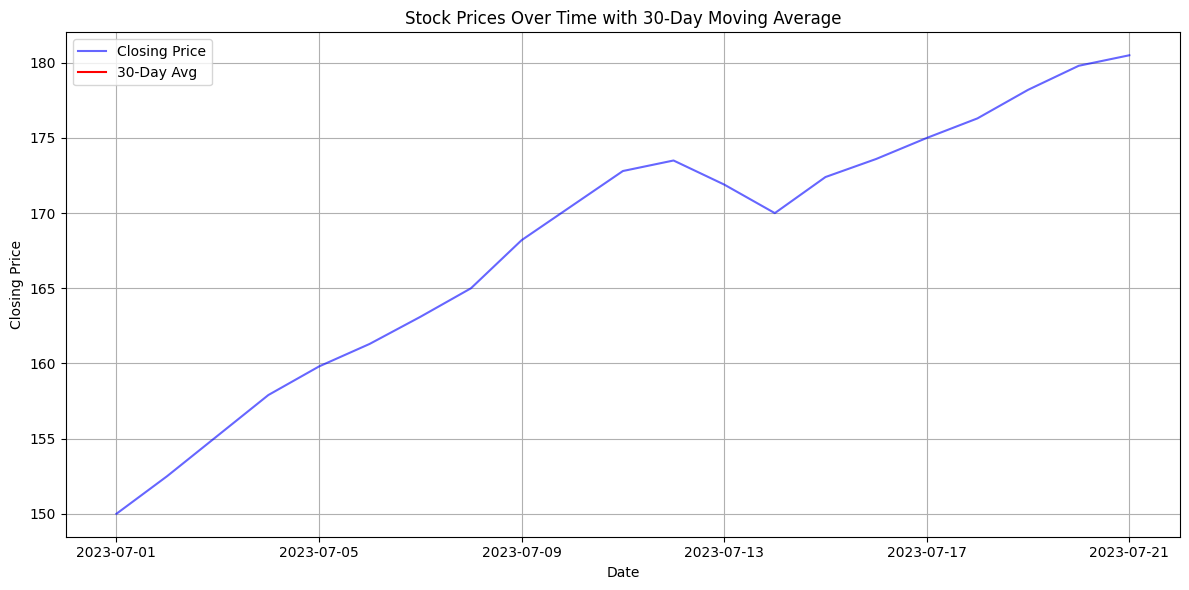

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


rolling_avg = df['closing_price'].rolling(window=30).mean()


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['closing_price'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(rolling_avg.index, rolling_avg, label='30-Day Avg', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Prices Over Time with 30-Day Moving Average')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()